In [1]:
# ! pip install pandas numpy matplotlib seaborn

In [2]:
import os
import sys
from pathlib import Path
from typing import List

from plotter import *
from plotter.epochstats import EpochStats
from plotter.plotheatmaps import PlotHeatMaps
from plotter.dataclass import HeatMapStat
from plotter.utils import vanilla_dirname, rqdc_dirname


lbs = [1/(SIZE_RATIO + (SIZE_RATIO * epsilon)) for epsilon in EPSILON_VALUES]

EXPDIRNAME = f"../../.vstats/experiments-{TAG}-U{UPDATES}-E{ENTRY_SIZE}-B{ENTRIES_PER_PAGE}-S{RANGE_QUERIES}-Y{SELECTIVITY}-T{SIZE_RATIO}"

In [3]:
all_stats: List[HeatMapStat] = list()
filesize = ENTRY_SIZE * ENTRIES_PER_PAGE * NUM_PAGE_PER_FILE

vandirpath = os.path.join(EXPDIRNAME, "VanillaRandom")
van_epoch_stats = EpochStats(vandirpath, NUMEPOCHS, filesize)

all_stats.append(
    {
        'lb': 0,
        'ub': 0,
        'plottingStats': van_epoch_stats.get_plotstats(),
        'rqStats': van_epoch_stats.get_rangequerystats(),
    }
)

for epsilon in EPSILON_VALUES:
    lb = 1/(SIZE_RATIO + (SIZE_RATIO * epsilon))
    rqdcdirpath = os.path.join(EXPDIRNAME, f"RangeReduceRandom{epsilon}")
    rqdc_epoch_stats = EpochStats(rqdcdirpath, NUMEPOCHS, filesize)

    all_stats.append(
        {
            'lb': lb,
            'ub': sys.maxsize,
            'plottingStats': rqdc_epoch_stats.get_plotstats(),
            'rqStats': rqdc_epoch_stats.get_rangequerystats(),
        }
    )

AttributeError: 'PlotHeatMaps' object has no attribute 'total_bytes_written'

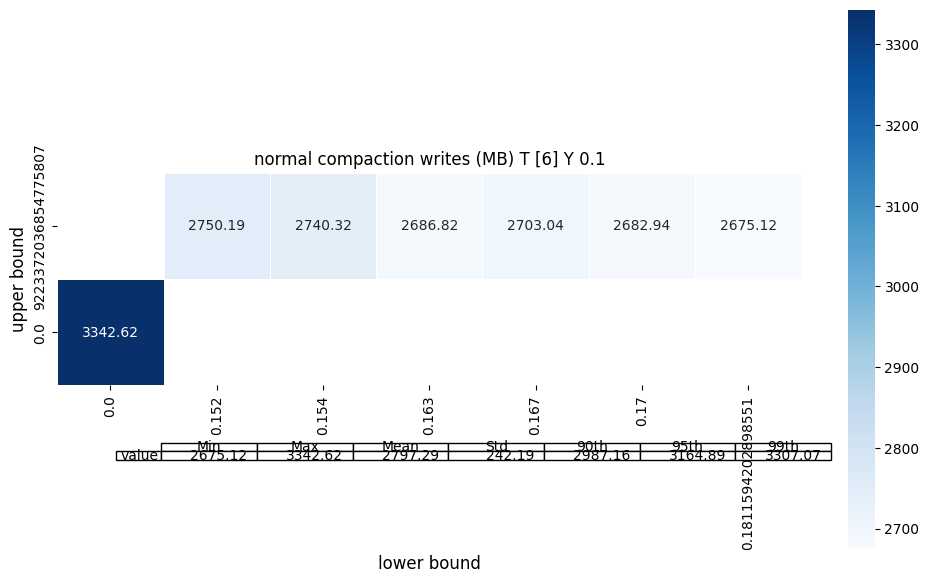

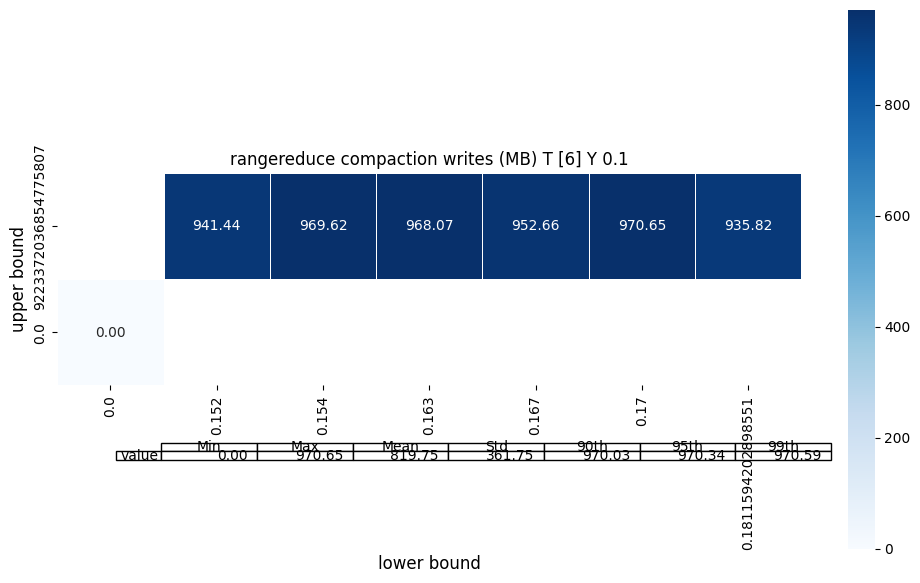

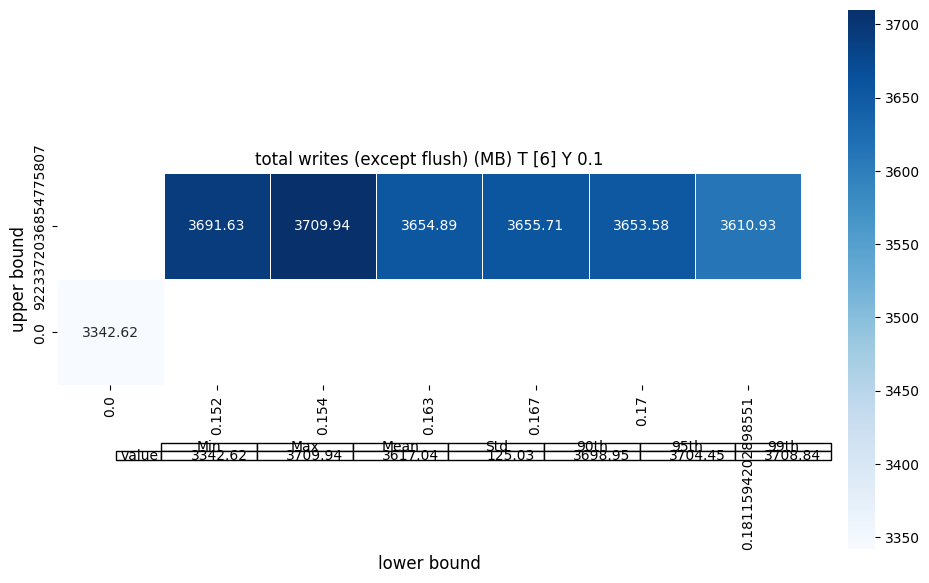

In [ ]:
plotheatmaps = PlotHeatMaps(all_stats)

plotheatmaps.compaction_bytes_written()
plotheatmaps.rangereduce_compaction_bytes_written()
plotheatmaps.total_bytes_written_except_flush()
# plotheatmaps.total_bytes_written()
plotheatmaps.spaceamp_debt()
plotheatmaps.compaction_debt()
plotheatmaps.avg_bytes_written_for_range_queries()
plotheatmaps.total_bytes_read_compaction()
plotheatmaps.avg_bytes_read_range_query()
plotheatmaps.avg_time_of_range_queries()
plotheatmaps.overall_data_movement()

# plotheatmaps.all_in_one()



In [ ]:
# TAG = "heatmap4"
# NUMEPOCHS = 1

# INSERTS = 4_500_000
# UPDATES = 1_125_000
# RANGE_QUERIES = 9000
# SELECTIVITY = 0.1
# SIZE_RATIO = 2
# ENTRY_SIZE = 16  # E
# ENTRIES_PER_PAGE = 64  # B
# NUM_PAGE_PER_FILE = 64  # P

# xx = SIZE_RATIO - 1
# bounds = sorted([SIZE_RATIO / (2**x) for x in range(xx-4, xx+5)])

# LABELS = [f"{SIZE_RATIO}/(2^{x})" for x in range(xx-4, xx+5)]
# LABELS.reverse()



In [ ]:
# def vanilla_dirname(comp: Dict[str, Union[int, float]]) -> str:
#     return (
#         f"I {comp['inserts']} U {comp['updates']} S {comp['range']} Y {comp['selectivity']} "
#         f"T {comp['sizeRatio']} rq 0 re 0 E {comp['entrySize']} B {comp['entriesPerPage']}"
#     )

# def rqdc_dirname(comp: Dict[str, Union[int, float]]) -> str:
#     return (
#         f"I {comp['inserts']} U {comp['updates']} S {comp['range']} Y {comp['selectivity']} "
#         f"T {comp['sizeRatio']} rq 1 re 0 E {comp['entrySize']} B {comp['entriesPerPage']} "
#         f"lb {comp['lowerBound']} ub {comp['upperBound']}"
#     )

In [ ]:
# PlottingStats = namedtuple(
#     "PlottingStats",
#     [
#         "CompactionDebt",
#         "WriteAmpDebt",
#         "WriteAmpDebtFull",
#         "WriteAmpDebtPartial",
#         "AvgEntriesPerFile",
#         "FilesCount",
#         "DBSize",
#         "ValidEntriesCount",
#         "InvalidEntriesCount",
#         "TotalWriteBytes",
#         "CompactionReadBytes",
#     ],
# )

# class RQColumn(Enum):
#     RQ_NUMBER="RQ Number",
#     RQ_TOTAL_TIME="RQ Total Time",
#     DATA_USEFUL_BYTES_WRITTEN="Data uBytes Written Back",
#     TOTAL_USEFUL_BYTES_WRITTN="Total uBytes Written Back",
#     USEFUL_ENTRIES_COUNT_WRITTEN="uEntries Count Written Back",
#     TOTAL_ENTRIES_READ="Total Entries Read",
#     DATA_UNUSEFUL_BYTES_WRITTEN="Data unBytes Written Back",
#     TOTAL_UNUSEFUL_BYTES_WRITTEN="Total unBytes Written Back",
#     UNUSEFUL_ENTRIES_COUNT_WRITTEN="unEntries Count Written Back",
#     RQ_REFRESH_TIME="RQ Refresh Time",
#     RQ_RESET_TIME="RQ Reset Time",
#     RQ_TIME="Actual RQ Time",

#     def __str__(self):
#         return '%s' % self.value

# class HeatMapStat(TypedDict):
#     lb: float
#     ub: float
#     plottingStats: List[PlottingStats]
#     rqStats: pd.DataFrame

# AdditionalStats = namedtuple(
#     'AdditionalStats',
#     [
#         'min',
#         'max',
#         'mean',
#         'std',
#         'p90th',
#         'p95th',
#         'p99th'
#     ]
# )

In [ ]:
# class EpochStats:
#     logfilename = 'workload.log'
#     rangequery_stats_filename = 'range_queries.csv'

#     def _compaction_debt(self, levels: Dict[str, List]) -> int:
#         """
#         assuming the levels is sorted by level 0, 1, ... L_n
#         $ \text{CD} = \sum_{i=1}^{L_{n-1}} \text{Bytes} \left( L_i \right)$
#         """
#         sum_of_bytes = 0
#         last_lvl_index = len(levels) - 1  # 0 indexed levels

#         for lvl, data in enumerate(levels):
#             if lvl == last_lvl_index or levels[lvl+1]['LevelSize'] == 0:
#                 break
#             sum_of_bytes += data['LevelSize']
        
#         return sum_of_bytes

#     def _writeamp_debt(self, levels: Dict[str, List]) -> int:
#         """
#         assuming the levels is sorted by level 0, 1, ... L_n
#         $ \text{WA} = \sum_{i=1}^{L_{n-1}} \text{Bytes} \left( L_i \right) \times (L_{n} - i) $
#         """
#         sum_of_bytes = 0
#         last_lvl_index = len(levels) - 1 # 0 indexed levels
#         last_non_empty_level_index = last_lvl_index

#         for data in levels[::-1]:
#             if data['LevelSize'] != 0:
#                 break
#             last_non_empty_level_index -= 1

#         for lvl, data in enumerate(levels):
#             if lvl == last_non_empty_level_index:
#                 break
#             sum_of_bytes += data['LevelSize'] * (last_non_empty_level_index - lvl)

#         return sum_of_bytes

#     def _writeampfull_debt(self, levels: Dict[str, List]) -> int:
#         """
#         assuming the levels is sorted by level 0, 1, ... L_n
#         $ \text{WA\textsuperscript{L1}} = \text{Bytes}\left( L_1 \right) \times (L_{n} - 1)$\\
#         $ \text{WA\textsuperscript{full}} = \text{WA\textsuperscript{L1}} + \sum_{i=2}^{L_{n}} \text{Bytes} \left( L_i \right) \times (L_{n} - i + 1) $
#         """
#         sum_of_bytes = 0
#         last_lvl_index = len(levels) - 1 # 0 indexed levels
#         last_non_empty_level_index = last_lvl_index

#         for data in levels[::-1]:
#             if data['LevelSize'] != 0:
#                 break
#             last_non_empty_level_index -= 1

#         for lvl, data in enumerate(levels):
#             if lvl > last_non_empty_level_index:
#                 break
#             if lvl == 0:
#                 sum_of_bytes += data['LevelSize'] * last_non_empty_level_index
#             else:
#                 sum_of_bytes += data['LevelSize'] * (last_non_empty_level_index - lvl + 1)

#         return sum_of_bytes

#     def _writeamppartial_debt(self, levels: Dict[str, List], filesize: int) -> int:
#         """
#         assuming the levels is sorted by level 0, 1, ... L_n
#         $ \text{File Size (FS)} = (P \times B)$ 
#         $ \text{WA\textsuperscript{partial}} = WA^{partial} + (\sum_{i=2}^{L_{n}} \text{Bytes} \left( L_{i-1} \right)) - FS \times (L_{n} - 1)$        """
#         sum_of_bytes = 0
#         last_lvl_index = len(levels) - 1 # 0 indexed levels
#         last_non_empty_level_index = last_lvl_index

#         for data in levels[::-1]:
#             if data['LevelSize'] != 0:
#                 break
#             last_non_empty_level_index -= 1
        
#         for lvl, data in enumerate(levels):
#             if lvl > last_non_empty_level_index:
#                 break
#             if lvl == 0:
#                 continue
#             sum_of_bytes += levels[lvl-1]['LevelSize']

#         return self._writeampfull_debt(levels) + (sum_of_bytes - (filesize * last_non_empty_level_index))

#     def _total_write_bytes(self, epoch_stats: List[str]):
#         write_bytes = 0

#         for line in epoch_stats:
#             if line.startswith('rocksdb.compact.write.bytes'): # or line.startswith('rocksdb.flush.write.bytes'):
#                 write_bytes += int(line.split(':')[1])
        
#         return write_bytes

#     def _compaction_read_bytes(self, epoch_stats: List[str]):
#         read_bytes = 0

#         for line in epoch_stats:
#             if line.startswith("rocksdb.compact.read.bytes"):
#                 read_bytes += int(line.split(':')[1])
        
#         return read_bytes

#     def _read_one_epoch(self):
#         with open(self.filepath, 'r') as file:
#             epoch_data = list()
#             grabbing_data = False

#             for line in file:
#                 line = line.strip()
#                 if line.startswith("=========="):
#                     if grabbing_data:
#                         yield epoch_data
#                         epoch_data = list()
#                         grabbing_data = False
#                 elif grabbing_data:
#                     epoch_data.append(line)
#                 else:
#                     grabbing_data = True
#                     epoch_data.append(line)

#     def _parse_one_epoch(self, epoch_stats: List[str]) -> Dict[str, List]:
#         columnfamilydata = {'Levels': list()}
#         sst_files = {}
#         i = 0

#         while i < len(epoch_stats):
#             currentline = epoch_stats[i]
#             # Check if the line contains column family data
#             if currentline.startswith("Column Family Name"):
#                 key_val = currentline.split(',')
#                 columnfamilydata["Column Family Name"] = key_val[0].split(':')[1].strip().strip(',')
#                 columnfamilydata["Size"] = int(key_val[1].split(':')[1].strip().strip(',').strip(' bytes'))
#                 columnfamilydata["Files Count"] = int(key_val[2].split(':')[1].strip().strip(','))
#                 columnfamilydata["Entries Count"] = int(key_val[3].split(':')[1].strip().strip(','))
#                 columnfamilydata["Invalid Entries Count"] = int(key_val[4].split(':')[1].strip().strip(','))                
#             if "Level:" in currentline:
#                 key_val = currentline.strip().split(',')
#                 level = int(key_val[0].split(":")[1].strip().strip(','))
#                 level_size = int(key_val[1].split(':')[1].strip().strip(',').strip(' bytes'))
#                 level_files_count = int(key_val[2].split(':')[1].strip().strip(','))

#                 key_val_sst_files = epoch_stats[i+1].split('],')[:-1]
#                 sst_files = []
                
#                 for sst_file_string in key_val_sst_files:
#                     # Extract SST file details
#                     file_number = int(sst_file_string.split(":")[0].split("[#")[1].strip())
#                     file_details = sst_file_string.split(":")[1].strip().split()
#                     file_size = int(file_details[0].strip())
#                     smallest_key = file_details[1].strip(',').strip('(')
#                     largest_key = file_details[2].strip(')')
#                     entries_count = int(file_details[3].strip(']'))

#                     sst_files.append({
#                         "FNo": file_number,
#                         "FileSize": file_size,
#                         "SmallesKey": smallest_key,
#                         "LargestKey": largest_key,
#                         "EntriesCount": entries_count
#                     })
                
#                 if len(sst_files) > 0:
#                     columnfamilydata["Levels"].append({
#                         "Level": level,
#                         "LevelSize": level_size,
#                         "LevelFilesCount": level_files_count,
#                         "SSTFiles": sst_files
#                     })
#                 i += 1
#             i += 1
#         return columnfamilydata

#     def _parse_logfile(self):
#         epoch = self.NUMEPOCHS
#         filereader = self._read_one_epoch()
#         next(filereader)

#         try:
#             while epoch > 0:
#                 one_epoch_stats_lines = next(filereader)
#                 columnfamilydata = self._parse_one_epoch(one_epoch_stats_lines)

#                 self._epoch_stats.append(columnfamilydata)
#                 sorted_cfd = sorted(columnfamilydata['Levels'], key=lambda x: x['Level'])
#                 writebytes = self._total_write_bytes(one_epoch_stats_lines)
#                 compaction_read = self._compaction_read_bytes(one_epoch_stats_lines)

#                 self._plotting_stats.append(
#                     PlottingStats(**{
#                         'CompactionDebt': self._compaction_debt(sorted_cfd),
#                         'WriteAmpDebt': self._writeamp_debt(sorted_cfd),
#                         'WriteAmpDebtFull': self._writeampfull_debt(sorted_cfd),
#                         'WriteAmpDebtPartial': self._writeamppartial_debt(sorted_cfd, self.FILESIZE),
#                         'AvgEntriesPerFile': columnfamilydata['Entries Count']/columnfamilydata['Files Count'],
#                         'FilesCount': columnfamilydata['Files Count'],
#                         'DBSize': columnfamilydata['Size'],
#                         'ValidEntriesCount': columnfamilydata['Entries Count'],
#                         'InvalidEntriesCount': columnfamilydata['Invalid Entries Count'],
#                         'TotalWriteBytes': writebytes,
#                         'CompactionReadBytes': compaction_read,
#                     })
#                 )
#                 epoch -= 1
#         except Exception as e:
#             raise Exception(f'failed to parse epoch {self.NUMEPOCHS - epoch} from log file: {self.filepath}')

#     def _pull_rqstats(self):
#         self._rangequery_stats = pd.read_csv(self.rqfilepath)
#         self._rangequery_stats = self._rangequery_stats.applymap(
#             lambda x: x.strip(" ") if isinstance(x, str) else x
#         )
#         self._rangequery_stats.columns = self._rangequery_stats.columns.str.strip()

#     def __init__(self, logdirpath: str, numepoch: int, filesize: int):
#         self._epoch_stats = list()
#         self._plotting_stats: List[PlottingStats] = list()
#         self.NUMEPOCHS = numepoch
#         self.FILESIZE = filesize

#         logfilepath = os.path.join(logdirpath, self.logfilename)

#         if not os.path.exists(logdirpath) or not os.path.exists(logfilepath):
#             if not os.path.exists(logdirpath):
#                 raise FileNotFoundError(f'log directory: {logdirpath} not found')
#             raise FileNotFoundError(f'log file {logfilepath} not found')

#         self.filepath = logfilepath
#         self._parse_logfile()

#         rqfilepath = os.path.join(logdirpath, self.rangequery_stats_filename)

#         if not os.path.exists(rqfilepath):
#             raise FileNotFoundError(f'range query log file {rqfilepath} not found')

#         self.rqfilepath = rqfilepath
#         self._pull_rqstats()

#     def get_plotstats(self) -> List[PlottingStats]:
#         return self._plotting_stats

#     def get_rangequerystats(self) -> pd.DataFrame:
#         return self._rangequery_stats

In [ ]:
# class PlotHeatMaps:
#     LAST_EPOCH_INDEX = NUMEPOCHS-1
#     FIGSIZE = (12, 7)

#     def __init__(self, stats: List[HeatMapStat]):
#         self._stats = list(stats)

#     def _get_percentiles(self, data: pd.Series, col: str) -> AdditionalStats:
#         percentiles = data[col].quantile([0.9, 0.95, 0.99]).to_dict()
#         return AdditionalStats(
#             min=data[col].min(),
#             max=data[col].max(),
#             mean=data[col].mean(),
#             std=data[col].std(),
#             p90th=percentiles[0.9],
#             p95th=percentiles[0.95],
#             p99th=percentiles[0.99],
#         )

#     def _plot_percentiles(self, data: AdditionalStats, ax):
#         cell_text = [
#             [
#                 f"{data.min:.2f}",
#                 f"{data.max:.2f}",
#                 f"{data.mean:.2f}",
#                 f"{data.std:.2f}",
#                 f"{data.p90th:.2f}",
#                 f"{data.p95th:.2f}",
#                 f"{data.p99th:.2f}",
#             ]
#         ]
#         rows = ["value"]

#         # Add a table at the bottom of the axes
#         ax.table(
#             cellText=cell_text,
#             rowLabels=rows,
#             colLabels=["Min", "Max", "Mean", "Std", "90th", "95th", "99th"],
#             loc="bottom",
#             bbox=[0.14, -0.35, 0.9, 0.08],
#         )

#     def _updated_xlabels(self, labels: List[str]) -> List[str]:
#         i = 0
#         for _ in range(len(bounds)-1):
#             labels[i+1] += f"\n{LABELS[(i)]}"
#             i += 1
#         return labels

#     def _updated_ylabels(self, labels: List[str]) -> List[str]:
#         i = 0
#         for _ in range(len(bounds)-1):
#             labels[i+1] = f"{LABELS[(i+1)]}\n" + labels[i+1]
#             i += 1
#         return labels

#     def _plot_heatmap(self, df: pd.DataFrame, col: str, title: str, vmin, vmax, fmt: str = ".2f"):
#         _, ax = plt.subplots(figsize=self.FIGSIZE)

#         pivot_table = df.pivot(index="ub", columns="lb", values=col)
#         sns.heatmap(
#             pivot_table,
#             annot=True,
#             fmt=fmt,
#             linewidths=0.5,
#             square=True,
#             cmap="Blues",
#             ax=ax,
#             vmin=vmin,
#             vmax=vmax
#         )
#         ax.set_xlabel("lower bound", fontsize=12)
#         ax.set_ylabel("upper bound", fontsize=12)

#         ax.set_xticklabels(
#             self._updated_xlabels([label.get_text() for label in ax.get_xticklabels()])
#         )
#         ax.set_yticklabels(
#             self._updated_ylabels([label.get_text() for label in ax.get_yticklabels()])
#         )

#         plt.title(title + f" T [{SIZE_RATIO}] Y {SELECTIVITY}", fontsize=12)
#         plt.gca().invert_yaxis()

#         self._plot_percentiles(data=self._get_percentiles(df, col), ax=ax)

#     def normalize_plotting_data(self, pltdata, key: str):
#         pltdata_copy = deepcopy(pltdata)

#         van_val = [val for val in pltdata if val["lb"] == 0 and val["ub"] == 0][0]

#         for data in pltdata_copy:
#             data[key] = data[key] / van_val[key]
#         return pltdata_copy

#     def total_bytes_written(self):
#         plotting = "writebytes"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["plottingStats"][
#                     self.LAST_EPOCH_INDEX
#                 ].TotalWriteBytes
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(
#             plotting_df, plotting, "total write (compaction + flushes) (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max())
#         )

#     def compaction_debt(self):
#         plotting = "compactiondebt"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["plottingStats"][
#                     self.LAST_EPOCH_INDEX
#                 ].CompactionDebt
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(plotting_df, plotting, "compaction debt (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()))

#     def writeamp_debt(self):
#         plotting = "writeampdebt"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["plottingStats"][
#                     self.LAST_EPOCH_INDEX
#                 ].WriteAmpDebt
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(plotting_df, plotting, "write amp debt (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()))

#     def spaceamp_debt(self):
#         plotting = "spaceamp"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["plottingStats"][self.LAST_EPOCH_INDEX].DBSize
#                 / (INSERTS * ENTRY_SIZE),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(plotting_df, plotting, "space amp", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()))

#     def compaction_reads(self):
#         plotting = "compactionread"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["plottingStats"][
#                     self.LAST_EPOCH_INDEX
#                 ].CompactionReadBytes
#                 / (1024 * 2),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(plotting_df, plotting, "compaction read (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()))

#     def avg_bytes_written_for_range_queries(self):
#         plotting = "rqbyteswritten"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["rqStats"][
#                     [
#                         str(RQColumn.DATA_USEFUL_BYTES_WRITTEN),
#                         str(RQColumn.DATA_UNUSEFUL_BYTES_WRITTEN),
#                     ]
#                 ]
#                 .sum(axis=1)
#                 .mean()
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(
#             plotting_df, plotting, "avg. bytes written in range queries (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max())
#         )

#     def total_bytes_read_compaction(self):
#         plotting = "compactionreadbytes"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["plottingStats"][
#                     self.LAST_EPOCH_INDEX
#                 ].CompactionReadBytes
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(
#             plotting_df, plotting, "bytes read in compactions (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max())
#         )

#     def avg_bytes_read_range_query(self):
#         plotting = "rqbytesread"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: (
#                     stat["rqStats"][[str(RQColumn.TOTAL_ENTRIES_READ)]].mean()[0]
#                     * ENTRY_SIZE
#                 )
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(
#             plotting_df, plotting, "avg. bytes read in range query (MB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()), fmt=".3f"
#         )

#     def avg_time_of_range_queries(self):
#         plotting = "rqqvgtime"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 plotting: stat["rqStats"][[str(RQColumn.RQ_TOTAL_TIME)]].mean()[0]
#                 / (1000**3),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(
#             plotting_df, plotting, "avg. time of range query (sec)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()), fmt=".3f"
#         )

#     def overall_data_movement(self):
#         plotting = "datamovement"
#         plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                  "datamovement": (
#                     stat["plottingStats"][self.LAST_EPOCH_INDEX].TotalWriteBytes
#                     + stat["plottingStats"][self.LAST_EPOCH_INDEX].CompactionReadBytes
#                     + (
#                         stat["rqStats"][str(RQColumn.TOTAL_ENTRIES_READ)].sum()
#                         * ENTRY_SIZE
#                     )
#                 )
#                 / (1024**3),
#             }
#             for stat in self._stats
#         ]

#         # plotting_data = self.normalize_plotting_data(plotting_data, plotting)

#         plotting_df = pd.DataFrame.from_dict(plotting_data)
#         self._plot_heatmap(
#             plotting_df,  "datamovement", "overall datamovement (GB)", np.floor(plotting_df[plotting].min()), np.ceil(plotting_df[plotting].max()), fmt=".3f"
#         )

#     def all_in_one(self):
#         plotting = "allInOne"

#         data_movement = "datamovement"
#         data_movement_plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                  data_movement: (
#                     stat["plottingStats"][self.LAST_EPOCH_INDEX].TotalWriteBytes
#                     + stat["plottingStats"][self.LAST_EPOCH_INDEX].CompactionReadBytes
#                     + (
#                         stat["rqStats"][str(RQColumn.TOTAL_ENTRIES_READ)].sum()
#                         * ENTRY_SIZE
#                     )
#                 )
#                 / (1024**3),
#             }
#             for stat in self._stats
#         ]
#         plotting_data_a = self.normalize_plotting_data(data_movement_plotting_data, data_movement)

#         rqqvgtime = "rqqvgtime"
#         range_query_avg_time_plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 rqqvgtime: stat["rqStats"][[str(RQColumn.RQ_TOTAL_TIME)]].mean()[0]
#                 / (1000**3),
#             }
#             for stat in self._stats
#         ]
#         plotting_data_b = self.normalize_plotting_data(range_query_avg_time_plotting_data, rqqvgtime)

#         spaceamp = "spaceamp"
#         spaceamp_plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 "spaceamp": stat["plottingStats"][self.LAST_EPOCH_INDEX].DBSize
#                 / (INSERTS * ENTRY_SIZE),
#             }
#             for stat in self._stats
#         ]
#         plotting_data_c = self.normalize_plotting_data(spaceamp_plotting_data, spaceamp)

#         compactiondebt = "compactiondebt"
#         compactiondebt_plotting_data = [
#             {
#                 "lb": stat["lb"],
#                 "ub": stat["ub"],
#                 "compactiondebt": stat["plottingStats"][
#                     self.LAST_EPOCH_INDEX
#                 ].CompactionDebt
#                 / (1024**2),
#             }
#             for stat in self._stats
#         ]
#         plotting_data_d = self.normalize_plotting_data(compactiondebt_plotting_data, compactiondebt)

#         all_in_one = [(plotting_data_a, data_movement), (plotting_data_b, rqqvgtime), (plotting_data_c, spaceamp), (plotting_data_d, compactiondebt)]

#         all_in_one_plotting_data = list()

#         for data in plotting_data_a:
#             lb = data['lb']
#             ub = data['ub']
#             value = 0
            
#             for metric_data, metric in all_in_one:
#                 for _data in metric_data:
#                     if _data['lb'] == lb and _data['ub'] == ub:
#                         value += _data[metric]
#                         break
            
#             all_in_one_plotting_data.append(
#                 {
#                     'lb': lb,
#                     'ub': ub,
#                     plotting: value/4
#                 }
#             )
#         plotting_df = pd.DataFrame.from_dict(all_in_one_plotting_data)
#         self._plot_heatmap(
#             plotting_df, plotting, "compaction debt + space amp + avg. RQ time + datamovement ", fmt=".3f"
#         )

